In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tqdm import tqdm

pd.options.display.max_colwidth = 200

import warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames[:5]:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
#!pip install --upgrade ipykernel

As we can not feed words directly into most of the models, we need numeric values for each text. In this notebook we discuss different techniques to represent a text document into numeric vectors. 

## Table of Contents

* [Bag of Words representation of texts](#bow)
    * [Countvectorizer](#cv)
    * [Tf-idf](#tfidf)
* [Topic Modelling](#tm)
* [Matrix Decomposition](#mf)
* [Visualizing Representations](#viz)

<a id='bow'></a>

# 1. Bag of Words representation of texts

A bag-of-words model, or BoW for short, is a way of extracting features from text for use in modeling, such as with machine learning algorithms.

The approach is very simple and flexible, and can be used in a myriad of ways for extracting features from documents.

A bag-of-words is a representation of text that describes the occurrence of words within a document. It involves two things:

1. A vocabulary of known words.
2. A measure of the presence of known words.

It is called a “bag” of words, because any information about the order or structure of words in the document is discarded. The model is only concerned with whether known words occur in the document, not where in the document.

In [ ]:
data = pd.read_csv('/kaggle/input/nlp-specialization-data/Cleaned_POS_Medical_Notes.csv') #for excel file use read_excel
data

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

<a id='cv'></a>

#### Countvectorizer

In Countvectorizer, we use counts to represent each word in each of the texts

In [ ]:
vector = CountVectorizer(lowercase=True, #this will convert all the tokens into lower case
                         stop_words='english', #remove english stopwords from vocabulary. if we need the stopwords this value should be None
                         analyzer='word', #tokens should be words. we can also use char for character tokens
                         max_features=50000 #maximum vocabulary size to restrict too many features
                        )

In [ ]:
sample_text = data.clean_text.iloc[:5]

In [ ]:
vectorized_corpus = vector.fit_transform(sample_text)

get_feature_names attribute will show all the words in the vocabulary

In [ ]:
print(len(vector.get_feature_names()))
vector.get_feature_names()[40:50]

Vectorized corpus is in sparse scipy matrix. We need to convert it into numpy array for display. However, if the vocab size is too big, numpy array can eat a lot of memory. Its wise to use sparse matrix for computation for big datasets

In [ ]:
vectorized_corpus.toarray()

In [ ]:
print (vectorized_corpus.shape)

If we want to remove too frequent or too rare we can use max_df and min_df arguments

In [ ]:
vector = CountVectorizer(lowercase=True, #this will convert all the tokens into lower case
                         stop_words='english', #remove english stopwords from vocabulary. if we need the stopwords this value should be None
                         analyzer='word', #tokens should be words. we can also use char for character tokens
                         max_features=500, #maximum vocabulary size to restrict too many features
                         max_df=.50, #if some word is in more than 50% of the documents, remove them
                         min_df=2 #words need to be in atleast 2 documents
                        )

In [ ]:
vectorized_corpus = vector.fit_transform(sample_text) #fit_transform method fit and then transform the data. We can also fit and transform separately.

In [ ]:
print (vectorized_corpus.shape)

Now let us add bi-gram and tri-gram to add more words into our vocabulary

In [ ]:
vector = CountVectorizer(lowercase=True, #this will convert all the tokens into lower case
                         stop_words='english', #remove english stopwords from vocabulary. if we need the stopwords this value should be None
                         analyzer='word', #tokens should be words. we can also use char for character tokens
                         max_features=50000, #maximum vocabulary size to restrict too many features
                         max_df=.5, #if some word is in more than 50% of the documents, remove them
                         min_df=2, #words need to be in atleast 2 documents
                         ngram_range=(1,3) #change ngram_range for n-grams
                        )

In [ ]:
vectorized_corpus = vector.fit_transform(sample_text)

In [ ]:
vector.get_feature_names()[:50]

In [ ]:
print (vectorized_corpus.shape)

<a id='tfidf'></a>

#### Tf-idf 

Countvectorizer uses just count of words in each of the document, which do not represent the relative strength of the words. Tf-idf addresses that issue by normalizing the counts by total number of words in the document and how many documents that particular word in

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vector = TfidfVectorizer(lowercase=True, #this will convert all the tokens into lower case
                         stop_words='english', #remove english stopwords from vocabulary. if we need the stopwords this value should be None
                         analyzer='word', #tokens should be words. we can also use char for character tokens
                         max_features=50000 #maximum vocabulary size to restrict too many features
                        )

In [ ]:
tfidf_vectorized_corpus = tfidf_vector.fit_transform(sample_text)

In [ ]:
tfidf_vectorized_corpus.toarray()

Let us apply tf-idf on the whole dataset

In [ ]:
data = data.dropna(subset=['clean_text'])

tfidf_vector = TfidfVectorizer(lowercase=True, #this will convert all the tokens into lower case
                         stop_words='english', #remove english stopwords from vocabulary. if we need the stopwords this value should be None
                         analyzer='word', #tokens should be words. we can also use char for character tokens
                         max_features=50000, #maximum vocabulary size to restrict too many features
                         min_df = 5,
                         max_df = .4
                        )

tfidf_vectorized_corpus = tfidf_vector.fit_transform(data.clean_text)

print (tfidf_vectorized_corpus.shape)

There are total 818 medical texts and 3831 is vocab size

### Visualizing Top words from Tf-idf representation

Under Tf-idf representation, words that carry high weightage are important for each text. Let us visualize top word based on tf-idf score for each of the specialties.

In [ ]:
top_words = tfidf_vector.get_feature_names()
top_words_df = pd.DataFrame(tfidf_vectorized_corpus.toarray(),columns=top_words)
top_words_df['speciality'] = data.label

In [ ]:
top_words_df.head(5)

In [ ]:
top_words_df_per_label = top_words_df.groupby(['speciality']).mean().reset_index(drop=False)
top_words_df_per_label = top_words_df_per_label.melt(id_vars=['speciality'],value_vars=top_words)
top_words_df_per_label.columns = ['speciality','top_word','word_weight']
top_words_df_per_label = top_words_df_per_label.sort_values(by=['speciality','word_weight'],ascending=[False,False]).reset_index(drop=True)
top_words_df_per_label = top_words_df_per_label.groupby(['speciality']).head(20).reset_index(drop=True)
top_words_df_per_label.head(5)

In [ ]:
from IPython.display import HTML, Image
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import plotly.express as px
#init_notebook_mode(connected=True)

all_colors = px.colors.qualitative.Plotly
print (all_colors)

In [ ]:
traces = []

for i, s in enumerate(list(set(top_words_df_per_label.speciality))):
    traces.append(go.Bar(
        x = top_words_df_per_label[top_words_df_per_label.speciality == s]['top_word'],
        y = top_words_df_per_label[top_words_df_per_label.speciality == s]['word_weight'],
        name=s,
        marker_color=all_colors[i%len(all_colors)]
    ))
    
layout = dict(
        width=1050,
        height=600,
        title = 'Top 20 Words for each Speciality', 
        yaxis=dict(
        title='Word Weight',
        titlefont_size=16,
        tickfont_size=14,
        ),  
    xaxis=dict(
        title='Top Words',
        titlefont_size=16,
        tickfont_size=14,
        ),  
    )

buttons = []
visibility = [False]*len(list(set(top_words_df_per_label.speciality)))
for i, s in enumerate(list(set(top_words_df_per_label.speciality))):
    visibility_ = visibility.copy()
    visibility_[i] = True
    buttons.append(
        dict(
            args = [{'visible': visibility_}],
            label=s,
            method='update',
        ))
    
updatemenus = list([
    dict(buttons=buttons,
    direction="down",
        pad = {'r':10, "t":10},
        showactive=True,
        x=0.3,
        y=1.15,
        yanchor='top')
])

layout['updatemenus'] = updatemenus

fig = dict(data=traces,layout=layout)
iplot(fig)

<a id='tm'></a>

### Topic Modelling

Topic modeling is a type of statistical modeling for discovering the abstract “topics” that occur in a collection of documents. Latent Dirichlet Allocation (LDA) is an example of topic model and is used to classify text in a document to a particular topic. It builds a topic per document model and words per topic model, modeled as Dirichlet distributions.

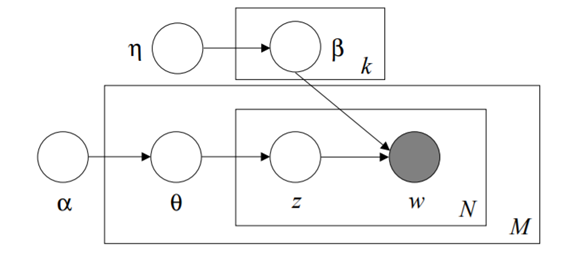

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
n_topics = 8

In [ ]:
lda = LatentDirichletAllocation(n_components=n_topics)
lda_features = lda.fit_transform(tfidf_vectorized_corpus)

In [ ]:
lda_features

In [ ]:
lda_features.shape

The numbers learned in lda follows probability distribution. Let us see the top topic for each text and interpret each topic.

In [ ]:
np.argmax(np.array([0.2,.34,.56,.09,.1]))

In [ ]:
np.argmax(np.array([0.92,.34,.56,.09,.1]))

In [ ]:
text_topics = lda_features.argmax(axis=1)
data['topic'] = text_topics
data

In [ ]:
pd.crosstab(data['topic'],data['label'])

In [ ]:
def print_top_words(model, feature_names, n_top_words):
    topic_df = pd.DataFrame()
    topic_df['topic_id'] = np.arange(n_topics)
    temp = []
    
    for topic_idx, topic in enumerate(model.components_):
        topic /= topic.sum()
        message = "Topic #%d: " % (topic_idx)
        message += " + ".join(["{:.3f} * {}".format(topic[i],feature_names[i])
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
        
        temp.append(",".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

    topic_df['top_words'] = temp
    
    print()
    
    return topic_df

In [ ]:
top_words = print_top_words(lda, tfidf_vector.get_feature_names(), n_top_words=5)

In [ ]:
data_topic_proportions = data.groupby(['topic'])['label'].value_counts(normalize=True).reset_index(name='topic_proportion')
data_topic_proportions.columns = ['topic','speciality','topic_proportion']
data_topic_proportions = data_topic_proportions.sort_values(['topic'],ascending=[True]).reset_index(drop=True)
#data_topic_proportions

In [ ]:
traces = []
for i in data_topic_proportions.speciality.unique():
    traces.append(go.Bar(name=i, x=data_topic_proportions[data_topic_proportions.speciality == i]['topic'], y=data_topic_proportions[data_topic_proportions.speciality == i]['topic_proportion']))

layout = dict(
        width=1200,
        height = 600,
        title = 'Top disease category for each topic', 
        yaxis=dict(
        title='Proportion',
        titlefont_size=16,
        tickfont_size=14,
        ),  
    xaxis=dict(
        title='Topic ID',
        titlefont_size=16,
        tickfont_size=14,
        ),  
    )

fig = go.Figure(data=traces,layout=layout)

fig.update_layout(barmode='stack')
fig.show()

In [ ]:
import pyLDAvis
#import pyLDAvis.gensim
import pyLDAvis.sklearn
from IPython.display import HTML

In [ ]:
viz = pyLDAvis.sklearn.prepare(lda_model=lda,vectorizer=tfidf_vector,dtm=tfidf_vectorized_corpus)

In [ ]:
pyLDAvis.save_html(viz,'vis.html')
HTML(filename='vis.html')

The numbers denote the relative strength of each word in each of the topics. These numbers are calculated during the process of LDA. We can extract the hidden aspect for each topic from these words. In practice, we maintain reverse dictionary to get the understanding behind each topic. However, as topics are meant for hidden semantics, often topics can demonstrate abstract concepts, which may not be comprehended by human judgment.

## Create Topic Model Using LDA (Gensim Library) & Compute Coherence Score

* https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0


In [ ]:
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
from gensim.models import ldamodel

In [ ]:
from nltk.tokenize import word_tokenize
data['reviews_token'] = [word_tokenize(sent) for sent in data.clean_text]

In [ ]:
data

In [ ]:
id2word = corpora.Dictionary(data.reviews_token)
texts = data.reviews_token
corpus = [id2word.doc2bow(text) for text in texts]

In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=8, 
                                           random_state=42,
                                           passes=10,
                                           per_word_topics=True)

In [ ]:
for i in lda_model.print_topics():
    print(i)
    print("\n")

In [ ]:
# Compute Coherence Score

coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

<a id='mf'></a>

# Matrix Factorization [Optional]

Matrix decomposition/factorization is an essential statistical technique to 

* Reduce dimensionality
* Feature extraction
* Semantic analysis

Matrix factorization can also be used to extract topical information.

In this notebook we use matrix decomposition to extract representation from texts

<a id='nmf'></a>

#### Non-negative Matrix Factorization

In NMF we split the matrix into two matrices with non-negative entries. 

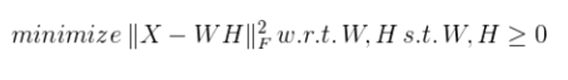

Due to the constraint, NMF can not be solved like typical matrix decomposition. NMF is solved by optimizing the above loss function using optimization techniques like - gradient descent.

In [ ]:
from sklearn.decomposition import NMF

In [ ]:
nmf_model = NMF(n_components=n_topics, l1_ratio=.5) #beta_loss='kullback-leibler'

In [ ]:
nmf_features = nmf_model.fit_transform(tfidf_vectorized_corpus)

In [ ]:
top_words_nmf = print_top_words(nmf_model, tfidf_vector.get_feature_names(), n_top_words=5)

In [ ]:
text_topics_nmf = nmf_features.argmax(axis=1)
data['topic_nmf'] = text_topics_nmf

data_topic_proportions = data.groupby(['topic_nmf'])['label'].value_counts(normalize=True).reset_index(name='topic_proportion')
data_topic_proportions.columns = ['topic_nmf','speciality','topic_proportion']
data_topic_proportions = data_topic_proportions.sort_values(['topic_nmf'],ascending=[True]).reset_index(drop=True)
#data_topic_proportions

In [ ]:
traces = []
for i in data_topic_proportions.speciality.unique():
    traces.append(go.Bar(name=i, x=data_topic_proportions[data_topic_proportions.speciality == i]['topic_nmf'], y=data_topic_proportions[data_topic_proportions.speciality == i]['topic_proportion']))

layout = dict(
        width=1200,
        height=600,
        title = 'Top disease category for each topic', 
        yaxis=dict(
        title='Topic Id',
        titlefont_size=16,
        tickfont_size=14,
        ),  
    xaxis=dict(
        title='Proportion',
        titlefont_size=16,
        tickfont_size=14,
        ),  
    )

fig = go.Figure(data=traces,layout=layout)

fig.update_layout(barmode='stack')
fig.show()

In [ ]:
viz_nmf = pyLDAvis.sklearn.prepare(lda_model=nmf_model,vectorizer=tfidf_vector,dtm=tfidf_vectorized_corpus)
pyLDAvis.save_html(viz_nmf,'vis_nmf.html')
HTML(filename='vis_nmf.html')

<a id='viz'></a>

### Visualizing Representations

We can use quantitative methods for evaluating representations learned from different model. However, as the task is unsupervised, most of the evaluations are based on similarity based metrics. As we see below, some of the representations preserve local properties i.e - similar texts have similar representation and cluster together. On the other hand, some methods look for global structures. Usually, people evaluate representations using downstream task specific metrics.

As we can not visualize 100-dim vectors, we use t-SNE embeddings to reduce the dimensions into 2. t-Distributed Stochastic Neighbor Embedding (t-SNE) is a technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets.

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca', learning_rate=200)
tsne_lda = tsne_model.fit_transform(lda_features)

In [ ]:
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca', learning_rate=200)
tsne_nmf = tsne_model.fit_transform(nmf_features)

In [ ]:
vis_data = pd.DataFrame()
vis_data['x'] = tsne_lda[:,0]
vis_data['y'] = tsne_lda[:,1]
vis_data['speciality'] = data.label
vis_data['topic_id'] = data.topic
vis_data = pd.merge(vis_data,top_words,how='inner')
vis_data.topic_id = vis_data.topic_id.astype(str)

fig = px.scatter(vis_data, x="x", y="y", color=vis_data.speciality, hover_data=['topic_id'], title="Projection of Clinical Texts (based on LDA)", height=600, width=1200) #hover_data=['top_words']
fig.show()

In [ ]:
fig = px.scatter(vis_data, x="x", y="y", color=vis_data.topic_id, hover_data=['top_words'], title="Projection of Clinical Texts (based on LDA)", height=600, width=1200) #hover_data=['top_words']
fig.show()

In [ ]:
vis_data = pd.DataFrame()
vis_data['x'] = tsne_nmf[:,0]
vis_data['y'] = tsne_nmf[:,1]
vis_data['speciality'] = data.label
vis_data['topic_id'] = data.topic_nmf
vis_data = pd.merge(vis_data,top_words_nmf,how='inner')
vis_data.topic_id = vis_data.topic_id.astype(str)

fig = px.scatter(vis_data, x="x", y="y", color=vis_data.speciality,  hover_data=['topic_id'], title="Projection of Clinical Texts (based on NMF)", height=600, width=1200) #hover_data=['top_words']
fig.show()

In [ ]:
fig = px.scatter(vis_data, x="x", y="y", color=vis_data.topic_id,  hover_data=['top_words'], title="Projection of Clinical Texts (based on NMF)", height=600, width=1200) #hover_data=['top_words']
fig.show()

### References for further reading

<strong> Visualization </strong>

https://matplotlib.org/tutorials/index.html

https://plotly.com/python

https://www.kaggle.com/thebrownviking20/intermediate-visualization-tutorial-using-plotly

<strong> Representation Learning </strong>

https://www.oreilly.com/library/view/applied-text-analysis/9781491963036/ch04.html

https://scikit-learn.org/stable/modules/feature_extraction.html

<strong> Topic Modelling </strong>

https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html

https://machinelearningmastery.com/introduction-to-matrix-decompositions-for-machine-learning/

https://medium.com/nanonets/topic-modeling-with-lsa-psla-lda-and-lda2vec-555ff65b0b05

<strong> T-SNE </strong>

https://distill.pub/2016/misread-tsne/